In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


#change1___added libraries
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#change2_creating pipeline
from sklearn.pipeline import Pipeline

#selecting a set of best features
from sklearn.feature_selection import SelectKBest, f_classif,chi2,mutual_info_regression, f_regression, SelectPercentile

# to check correlation between features
from pandas import DataFrame, read_csv

#describe dataframe
from scipy import stats
cvn = 10

In [3]:
#load train and test
train=pd.read_csv('./CS6301-S19-MidTermProject/bb_2000s_train.csv',delimiter=',',header=0)
test=pd.read_csv('./CS6301-S19-MidTermProject/bb_2000s_test.csv',delimiter=',',header=0)

In [4]:
train_y=train.iloc[:,-1]
#train_x=train.iloc[:,3:-1]
train_x=train.iloc[:,[3,4,6,7,8,9,11,12,14]]
test=test.iloc[:,[0,1,3,4,5,6,8,9,11]]

#change2____added below line
#train_norm_x = normalize(train_x, axis =0)

In [5]:
#train, test and validation partition
tst_frac=0.25


#change3_____train_x changed to train_norm_x
#X_trn, X_tst, y_trn, y_tst = train_test_split(train_x, train_y, test_size=tst_frac,random_state=42)
X_trn, X_tst, y_trn, y_tst = train_test_split(train_x, train_y, test_size=tst_frac,random_state=42)

  
#X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac,random_state=42)

In [6]:
test[0:4]

,PreviousHit,Danceability,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Tempo
0,1,0.663,7,-4.557,1,0.0356,0.000,0.2950,98.001
1,0,0.408,2,-4.675,1,0.0573,0.908,0.3430,187.526
2,0,0.657,11,-7.104,0,0.0757,0.000,0.0932,97.862
3,0,0.356,8,-11.852,1,0.0454,0.760,0.1080,169.956


In [7]:
train_x[0:4]

,PreviousHit,Danceability,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Tempo
0,1,0.470,9,-7.976,1,0.0308,0.000035,0.378,165.339
1,0,0.540,1,-5.221,1,0.0246,0.000000,0.204,135.900
2,0,0.810,4,-2.672,0,0.2410,0.000000,0.313,87.328
3,1,0.411,8,-2.522,0,0.0583,0.001480,0.371,165.981


In [8]:
corr = X_trn.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,PreviousHit,Danceability,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Tempo
PreviousHit,1,0.12,0.012,0.17,0.015,-0.081,-0.23,-0.086,0.013
Danceability,0.12,1,-0.026,0.16,-0.12,0.13,-0.26,-0.088,-0.17
Key,0.012,-0.026,1,0.02,-0.13,0.054,-0.029,0.048,0.0059
Loudness,0.17,0.16,0.02,1,-0.032,0.013,-0.4,0.054,0.17
Mode,0.015,-0.12,-0.13,-0.032,1,-0.068,-0.029,-0.047,0.037
Speechiness,-0.081,0.13,0.054,0.013,-0.068,1,-0.12,0.26,-0.058
Instrumentalness,-0.23,-0.26,-0.029,-0.4,-0.029,-0.12,1,-0.01,-0.044
Liveness,-0.086,-0.088,0.048,0.054,-0.047,0.26,-0.01,1,0.015
Tempo,0.013,-0.17,0.0059,0.17,0.037,-0.058,-0.044,0.015,1


In [9]:
normalize=Normalizer()
min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pandas.DataFrame(x_scaled)


In [10]:
#---------------------------------------------SVM-------------------------------------------------------------
from sklearn.svm import SVC

In [11]:
gamma_range = np.arange(-3.0, 3.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
C_range = np.arange(-2.0, 5.0, 1.0)
C_values = np.power(10.0, C_range)

SVMmodels = dict()
trnErr = dict()
valErr = dict()



#fselect=SelectKBest(f_classif,k=9)

print ('------------------Training errors C vs Gamma----------------------')
print ('\n')
print ('                   Gamma values                        ')
print ('\n')
print ('\t',end='')
print('\t'.join(map(str,gamma_values)))
for C in C_values:
    print (C)
    for G in gamma_values:
        clf= SVC(C=C,kernel='rbf',gamma=G)
        SVCclf = Pipeline([('normalization', normalize),
                           ('min_max_scaler', min_max_scaler),
                           ('SVM', clf)])
        SVMmodels[(C,G)]=SVCclf.fit(X_trn,y_trn)
        valErr[(C,G)]=1-np.mean(cross_val_score(SVCclf,X_trn,y_trn,cv=cvn))
        trnErr[(C,G)]=1-SVCclf.score(X_trn,y_trn)
        
        print ('\t'+str(np.round(trnErr[(C,G)],decimals=5)),end='')
    print ('\n')   


print ('\n\n\n')
print ('------------------Validation errors  C vs Gamma----------------------')
print ('\n')
print ('                   Gamma values                        ')
print ('\n')
print ('\t',end='')
print('\t'.join(map(str,gamma_values)))
for C in C_values:
    print (C)
    for G in gamma_values:
        print ('\t'+str(np.round(valErr[(C,G)],decimals=5)),end='')
    print ('\n') 
    
temp=min(valErr.values())
best_params=[param for param,score in valErr.items() if score==temp]

print ('\n\n\n')
print ('best set of values for C and gamma respectively are=')
print (best_params)
print ('Test error for the best C and gamma is =')
print (1-SVMmodels[best_params[0]].score(X_tst,y_tst))

------------------Training errors C vs Gamma----------------------


                   Gamma values                        


	0.001	0.01	0.1	1.0	10.0	100.0
0.01
	0.38787	0.38787	0.38787	0.3787	0.29478	0.38787

0.1
	0.38787	0.38787	0.32017	0.25247	0.25035	0.32228

1.0
	0.38787	0.31876	0.25247	0.25247	0.24542	0.15938

10.0
	0.31805	0.25247	0.25247	0.25106	0.20451	0.05219

100.0
	0.25247	0.25247	0.25176	0.24612	0.17278	0.01693

1000.0
	0.25247	0.25247	0.25106	0.22638	0.11425	0.00141

10000.0
	0.25247	0.25176	0.24965	0.20381	0.0677	0.0





------------------Validation errors  C vs Gamma----------------------


                   Gamma values                        


	0.001	0.01	0.1	1.0	10.0	100.0
0.01
	0.38787	0.38787	0.38787	0.38787	0.3251	0.38787

0.1
	0.38787	0.38787	0.3498	0.25248	0.2539	0.3385

1.0
	0.38787	0.34134	0.25248	0.25248	0.25319	0.27296

10.0
	0.34064	0.25248	0.25248	0.2539	0.24616	0.32511

100.0
	0.25248	0.25248	0.25389	0.2539	0.27367	0.32296

1000.0
	0.25248	0.25248	0.

In [12]:
#High value of C suggests that the model is highly non-linear

In [13]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

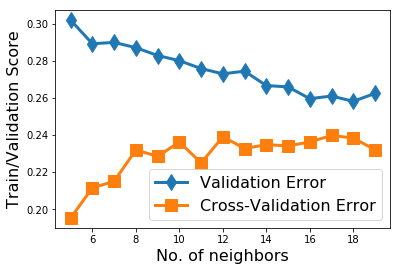

best model is one with number of neighbors=
[18]
Test error corresponding to best_k is :
0.20507399577167018


In [14]:
#change______________________________________________________
#k_list=[1,5,11,15,21]
k_range = np.arange(5, 20, 1)

kModels=dict()
#kValErr=dict()
kCValErr=dict()
kTrnErr=dict()

#change______________________________________________________
#for k in k_list:
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    KNNclf= Pipeline([('normalization', normalize),
                      ('min_max_scaler', min_max_scaler),
                       ('KNN', neigh)])
    kModels[k]=KNNclf.fit(X_trn,y_trn)
    #kValErr[k]=1-KNNclf.score(X_val,y_val)
    kCValErr[k] = 1- np.mean(cross_val_score(KNNclf,X_trn,y_trn, cv=cvn))
    kTrnErr[k]=1-KNNclf.score(X_trn,y_trn)



plt.figure()
#plt.plot(kValErr.keys(), kValErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(kCValErr.keys(), kCValErr.values(), marker='d', linewidth=3, markersize=12)
plt.plot(kTrnErr.keys(), kTrnErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('No. of neighbors', fontsize=16)
plt.ylabel('Train/Validation Score', fontsize=16)
#plt.xticks(list(kValErr.keys()), fontsize=12)
plt.legend(['Validation Error','Cross-Validation Error', 'Train Error'], fontsize=16)
#change__________________removed the below line
#plt.axis([0, 22, -1, 1])

plt.show()

#temp=min(kValErr.values())
temp=min(kCValErr.values())
#best_k=[param for param,score in kValErr.items() if score==temp]
best_k=[param for param,score in kCValErr.items() if score==temp]
print ('best model is one with number of neighbors=')
print (best_k)

print ('Test error corresponding to best_k is :')
print (1-kModels[best_k[0]].score(X_tst,y_tst))

In [15]:
#change______________

neigh = KNeighborsClassifier(n_neighbors=best_k[0], algorithm='kd_tree')
KNNclf= Pipeline([('normalization', normalize),
                  ('min_max_scaler', min_max_scaler),
                  ('KNN', neigh)])
knmodel=KNNclf.fit(X_trn,y_trn)
print (1-knmodel.score(X_tst,y_tst))

predict_proba = knmodel.predict_proba(X_tst)
fpr_kn, tpr_kn, thresholds_kn = metrics.roc_curve(y_tst, predict_proba[:,1])
roc_auc_kn = metrics.auc(fpr_kn, tpr_kn)

0.20507399577167018


In [16]:
#random forest
from sklearn.ensemble import RandomForestClassifier

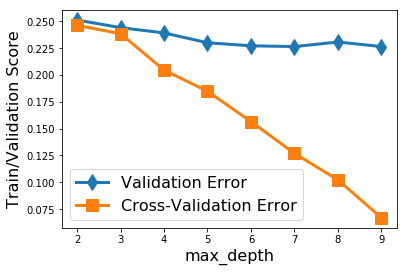

best model is one with max_depth=
[7]
Test error corresponding to this model is :
0.17336152219873147


In [17]:
d_range = np.arange(2, 10, 1)

rfModels=dict()
#rfValErr=dict()
rfCValErr=dict()
rfTrnErr=dict()


for d in d_range:
    clf = RandomForestClassifier(n_estimators=100, max_depth=d,random_state=0,max_features=4)
    RFclf= Pipeline([('normalization', normalize),
                     ('min_max_scaler', min_max_scaler),
                       ('RF', clf)])
    rfModels[d]=RFclf.fit(X_trn,y_trn)
    rfTrnErr[d]=1-RFclf.score(X_trn,y_trn)
    rfCValErr[d] = 1- np.mean(cross_val_score(RFclf,X_trn,y_trn, cv=cvn))
    #rfValErr[d]=1-RFclf.score(X_val,y_val)

plt.figure()
#plt.plot(rfValErr.keys(), rfValErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(rfCValErr.keys(), rfCValErr.values(), marker='d', linewidth=3, markersize=12)
plt.plot(rfTrnErr.keys(), rfTrnErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('Train/Validation Score', fontsize=16)
#plt.xticks(list(rfValErr.keys()), fontsize=12)
plt.legend(['Validation Error','Cross-Validation Error', 'Train Error'], fontsize=16)
#change____________________________________________________________
#plt.axis([1, 11, 0, 0.5])

plt.show()

#temp=min(rfValErr.values())
temp=min(rfCValErr.values())
#best_d=[param for param,score in rfValErr.items() if score==temp]
best_d=[param for param,score in rfCValErr.items() if score==temp]
print ('best model is one with max_depth=')
print (best_d)

print ('Test error corresponding to this model is :')
print (1-rfModels[best_d[0]].score(X_tst,y_tst))

In [18]:
clf = RandomForestClassifier(n_estimators=100, max_depth=best_d[0],random_state=0,max_features=4)
RFclf= Pipeline([('normalization', normalize),
                ('min_max_scaler', min_max_scaler),
                ('RF', clf)])
rfmodel=RFclf.fit(X_trn,y_trn)
print (1-rfmodel.score(X_tst,y_tst))

predict_proba = rfmodel.predict_proba(X_tst)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_tst, predict_proba[:,1])
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

0.17336152219873147


In [19]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [20]:
clf=GaussianNB()
NBclf=Pipeline([('normalization', normalize),
                ('min_max_scaler', min_max_scaler),
                       ('NB', clf)])
nbmodel=NBclf.fit(X_trn,y_trn)
nbTrnErr=1-NBclf.score(X_trn,y_trn)
#nbValErr=1-NBclf.score(X_val,y_val)
nbCValErr=1- np.mean(cross_val_score(NBclf,X_trn,y_trn, cv=cvn))
print (nbCValErr)

0.4217860353611027


In [21]:
#change_____________________________
predict_proba = nbmodel.predict_proba(X_tst)

fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(y_tst, predict_proba[:,1])

roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression(random_state=0, solver='liblinear')
LRclf=Pipeline([('normalization', normalize),
                ('min_max_scaler', min_max_scaler),
                       ('LR', clf)])
lrmodel=LRclf.fit(X_trn,y_trn)
lrTrnErr=1-LRclf.score(X_trn,y_trn)
#lrValErr=1-LRclf.score(X_val,y_val)
lrCValErr=1- np.mean(cross_val_score(LRclf,X_trn,y_trn, cv=cvn))
print (lrCValErr)

0.25177804415143346


In [24]:
#change_____________________________
predict_proba = lrmodel.predict_proba(X_tst)

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_tst, predict_proba[:,1])

roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

In [25]:
#Boosting
from xgboost import XGBClassifier

In [26]:
clf=XGBClassifier()
XGBclf=Pipeline([('normalization', normalize),
                 ('min_max_scaler', min_max_scaler),
                       ('XGB', clf)])
xgbmodel=XGBclf.fit(X_trn,y_trn)
xgbTrnErr=1-XGBclf.score(X_trn,y_trn)
#xgbValErr=1-XGBclf.score(X_val,y_val)
xgbCValErr=1- np.mean(cross_val_score(XGBclf,X_trn,y_trn, cv=10))
print (xgbCValErr)

0.22426331035860558


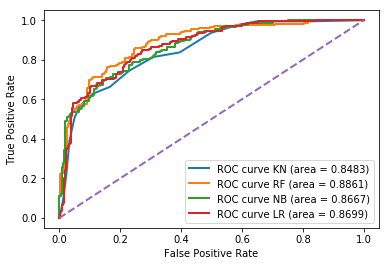

In [27]:
#change___________________________________
from sklearn import metrics

plt.figure()

plt.plot(fpr_kn, tpr_kn, lw=2, label = 'ROC curve KN (area = %0.4f)'% roc_auc_kn)
plt.plot(fpr_rf, tpr_rf, lw=2, label = 'ROC curve RF (area = %0.4f)'% roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, lw=2, label = 'ROC curve NB (area = %0.4f)'% roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, lw=2, label = 'ROC curve LR (area = %0.4f)'% roc_auc_lr)

plt.plot([0,1],[0,1],lw=2,linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [28]:
print ("Cross Validation Errors")
print (valErr[(best_params[0])])
print (kCValErr[best_k[0]])
print (rfCValErr[best_d[0]])
print (nbCValErr)
print (lrCValErr)
print (xgbCValErr)

Cross Validation Errors
0.24616421935870536
0.2581660173808811
0.2263759864149436
0.4217860353611027
0.25177804415143346
0.22426331035860558


In [29]:
print ("Test Errors")
print (1-SVMmodels[best_params[0]].score(X_tst,y_tst))
print (1-kModels[best_k[0]].score(X_tst,y_tst))
print (1-rfModels[best_d[0]].score(X_tst,y_tst))
print (1-NBclf.score(X_tst,y_tst))
print (1-LRclf.score(X_tst,y_tst))
print (1-XGBclf.score(X_tst,y_tst))

Test Errors
0.18393234672304437
0.20507399577167018
0.17336152219873147
0.37632135306553915
0.18604651162790697
0.19661733615221988


In [30]:
X=rfModels[best_d[0]].predict(test)

In [31]:
np.savetxt('predictions.txt',X, newline='\n')